<a href="https://colab.research.google.com/github/7692TITO/-NYC-Taxi-Trip-Time-Prediction/blob/main/(Loud_n_Cloud)_NYC_Taxi_Trip_Time_Prediction_(Loud_n_Cloud)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

#Introduction
This is our Regression Capstone Project,hence we will be looking into multiple regression models and try to come up with a best model at the end of this project. We are only focussing on all that algorithm which has been taught to us till now in our class. 
SVM,Time Series, Clustering and many more algos. still yet to be taught to us.


#ML Pipeline to be followed 

1. Basic  Dataset Understanding(Dimensionality,records,Data Types,5-point summary)
2.Data Preprocessing
3. Data Cleaning
4. Exploratory Data Analysis
5. Feature Engineering
6. Feature Selection
7. Model Buliding
8. Evaluation
9. Hyperparameter tuning/cross Validation
10.Conclusions



In [2]:
#Importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [4]:
#Mounting the Drive inorder to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the csv dataset
df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip (Supervised ML Regression)-Tito Varghese/NYC Taxi Data.csv')

#1.Basic Dataset Understanding(Dimensionality,records,Data Types,5-point summary)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


The dataset info tells us that the dataset contains 1458644 records and 11 columns.Out of 11 columns,4 columns are object datatype ,4 columns are float datatype and remaing 3 columns are integer datatype.

The dataset doesn't contain any null values in any of the columns.

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


The describe function gives us a five - point summary of our numerical columns present in our dataset(min,25%,50%,75% and max details)

Apart from that,it tells the mean and standard deviation values of all respective numerical columns

In [8]:
df.shape

(1458644, 11)

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [10]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

We see that id has 1458644 unique values which are equal to the number of rows in our dataset.

There are 2 unique vendor ids.

There are 10 unique passenger counts.

There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

#2.Data Preprocessing

Next we will add some features to the dataset and at the same time also remove the outliers

#Converting the datatype of pickup date time and dropoff date time to datetime datatype

In [12]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

#Adding few new Features  into the dataset

#Now, let us extract and create new features from this datetime features we just created 

In [13]:
#Extract hour from pickup and dropoff datetime columns
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

#Extract day from pickup and dropoff datetime columns
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

#Extract date from pickup and dropoff datetime columns
df['pickup_date']=pd.DatetimeIndex(df['pickup_datetime']).day
df['dropoff_date']=pd.DatetimeIndex(df['dropoff_datetime']).day

#Extract month from pickup and dropoff datetime columns
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

#Extract weekday from pickup and dropoff datetime columns
df['pickup_weekday']=df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

pickup_day and dropoff_day which will contain the name of the day on which the ride was taken. 

pickup_weekday and dropoff_weekday which will contain the day number instead of characters with Monday=0 and Sunday=6. 

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format. 

pickup_date and dropoff_date will provide the date of the trip.

pickup_month and dropoff_month with month number with January=1 and December=12. Next, I have 

#New feature created time_zone
Defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [14]:
def time_zone(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [15]:
df['pickup_timezone']=df['pickup_hour'].apply(time_zone)
df['dropoff_timezone']=df['dropoff_hour'].apply(time_zone)

#New feature Created distance 

We also saw during dataset exploration that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that.
So, the most obvious feature that we can extract from this is distance. Let us do that.

Importing the library which lets us calculate distance from geographical coordinates.

In [16]:
from geopy.distance import great_circle

In [17]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [18]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

#New feature created trip direction 

It was observed, especially for the airport trips, that the direction of the trip also has some effect on the trip duration.

Let's add the bearing of each trip which simply means the overall direction in which the taxi travelled from the pickup point to the dropoff point.

The convention followed here is such the North is denoted as 0 degrees, East as 90 degrees, South as 180 degrees and circle back to North as 360 degrees.

In [19]:
import math
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [20]:
df['trip_direction'] = df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'], 
                       x['dropoff_longitude']), axis = 1)

#New Feature created trip_speed

In [21]:
df['time_diff_minutes']= df['dropoff_datetime']- df['pickup_datetime']
df['time_diff_minutes']= df['time_diff_minutes']/np.timedelta64(1,'m')

In [22]:
#The trip_speed unit will be mph
def speed(x,y):
  z = (x*0.621)/(y*0.016667)
  return z

In [23]:
df['trip_speed']= df.apply(lambda x: speed(x['distance'],x['time_diff_minutes']),axis=1)

#Thus, we successfully created some new features which we will analyze in univariate and bivariate analysis.

In [24]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance,trip_direction,time_diff_minutes,trip_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,0,0,Evening,Evening,1.498523,99.970196,7.583333,7.362705
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,6,Late night,Late night,1.805510,242.846232,11.050000,6.087959
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,1,Morning,Afternoon,6.385108,200.319835,35.400000,6.720462
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,2,2,Evening,Evening,1.485501,187.262300,7.150000,7.741069
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,5,5,Afternoon,Afternoon,1.188590,179.473585,7.250000,6.108411


#3.Data Cleaning

In [25]:
#Checking Missing Values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
dropoff_hour          0
pickup_day            0
dropoff_day           0
pickup_date           0
dropoff_date          0
pickup_month          0
dropoff_month         0
pickup_weekday        0
dropoff_weekday       0
pickup_timezone       0
dropoff_timezone      0
distance              0
trip_direction        0
time_diff_minutes     0
trip_speed            0
dtype: int64

In [26]:
#Checking Duplicated Rows
df.duplicated().sum()

0

#Handling Outliers

The pickup  latitudes and longitudes should be within the NYC boundary defined as
pickup latitude/longitude < 1th percentile value of the pickup latitude/longitude and pickup latitude/longitude > 99.8th percentile value of the trip duration

tripduration < 1th percentile value of the trip duration and trip_duration > 99.8th percentile value of the trip duration

distance  between the pickup and dropoff points is > its 1th percentile value and < its 99.8th percentile value.

trip_speed  between the pickup and dropoff points is > its 1th percentile value and < its 99.8th percentile value.



Removing Outliers from Pickup_latitude

Over here we will be take to consideration data records which lies between 99% and 1% range and consider records outside this range as outliers .Hence we will drop records which are outside the range from the dataset

In [27]:
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(df)))
for i in percentile_speed:
    print("{}% of the latitude were below {:.2f} degree".format(i, np.percentile(df.pickup_latitude, i)))

Total number of trips = 1,458,644
1% of the latitude were below 40.64 degree
25% of the latitude were below 40.74 degree
50% of the latitude were below 40.75 degree
75% of the latitude were below 40.77 degree
95% of the latitude were below 40.79 degree
99% of the latitude were below 40.81 degree
99.8% of the latitude were below 40.83 degree


In [28]:
df = df[df['pickup_latitude'] <=np.percentile(df.pickup_latitude,99.8) ] #filtering records 
df = df[df['pickup_latitude']>=np.percentile(df.pickup_latitude,1) ]

In [29]:
df.shape

(1441261, 27)

Removing Outliers from pickup_longitude and pickup latitude

In [30]:
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(df)))
for i in percentile_speed:
    print("{}% of the longitude were below {:.2f} degree".format(i, np.percentile(df.pickup_longitude, i)))

Total number of trips = 1,441,261
1% of the longitude were below -74.01 degree
25% of the longitude were below -73.99 degree
50% of the longitude were below -73.98 degree
75% of the longitude were below -73.97 degree
95% of the longitude were below -73.94 degree
99% of the longitude were below -73.79 degree
99.8% of the longitude were below -73.78 degree


In [31]:
df = df[df['pickup_longitude'] <=np.percentile(df.pickup_longitude,99.8) ] #filtering records 
df = df[df['pickup_longitude']>=np.percentile(df.pickup_longitude,1) ]

In [32]:
df.shape

(1424181, 27)

Removing Outliers from trip_duration

In [33]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(df)))
for i in percentile_trip_duration:
    print("{}% of the trips were below {:.2f} seconds".format(i, np.percentile(df.trip_duration, i)))

Total number of trips = 1,424,181
1% of the trips were below 90.00 seconds
25% of the trips were below 394.00 seconds
50% of the trips were below 655.00 seconds
75% of the trips were below 1056.00 seconds
95% of the trips were below 2018.00 seconds
99% of the trips were below 3264.00 seconds
99.8% of the trips were below 5358.00 seconds


In [34]:
df = df[df['trip_duration'] <= np.percentile(df.trip_duration,99.8)] #filtering records 
df = df[df['trip_duration'] >=np.percentile(df.trip_duration,1) ]

In [35]:
df.shape

(1407301, 27)

Removing Outliers from distance

In [36]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(df)))
for i in percentile_trip_duration:
    print("{}% of the distance were below {:.2f} km".format(i, np.percentile(df.distance, i)))

Total number of trips = 1,407,301
1% of the distance were below 0.32 km
25% of the distance were below 1.25 km
50% of the distance were below 2.08 km
75% of the distance were below 3.78 km
95% of the distance were below 10.15 km
99% of the distance were below 20.24 km
99.8% of the distance were below 22.26 km


In [37]:
df = df[df['distance'] <= np.percentile(df.distance,99.8)] #filtering records 
df = df[df['distance'] >= np.percentile(df.distance,1)]

In [38]:
df.shape

(1390441, 27)

Removing Outliers from trip_speed

In [39]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(df)))
for i in percentile_trip_duration:
    print("{}% of the speed were below {:.2f} mph".format(i, np.percentile(df.trip_speed, i)))

Total number of trips = 1,390,441
1% of the speed were below 2.17 mph
25% of the speed were below 5.72 mph
50% of the speed were below 7.92 mph
75% of the speed were below 10.93 mph
95% of the speed were below 17.67 mph
99% of the speed were below 24.39 mph
99.8% of the speed were below 29.81 mph


In [40]:
df.trip_speed.min()

0.161158182494947

In [41]:
df.trip_speed.max() #practically not possible in nyc busy city roads ,its a outlier

362.492270381758

In [42]:
df = df[df['trip_speed'] <= np.percentile(df.trip_speed,99.8)] #filtering records 
df = df[df['trip_speed'] >= np.percentile(df.trip_speed,1)]

In [43]:
df.shape

(1373783, 27)

In [44]:
df.drop(labels='id',inplace=True,axis=1)

In [45]:
categorical_features=df.describe(include='object').columns

In [46]:
categorical_features

Index(['store_and_fwd_flag', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone'],
      dtype='object')

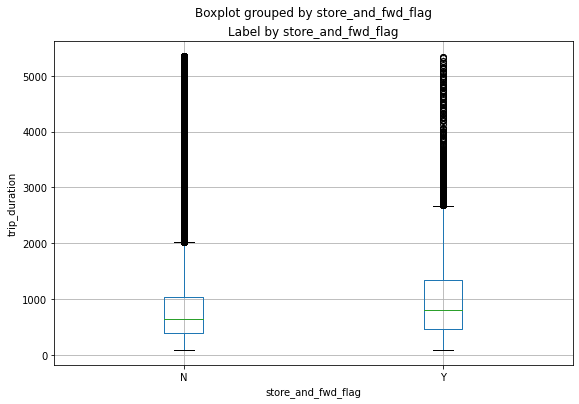

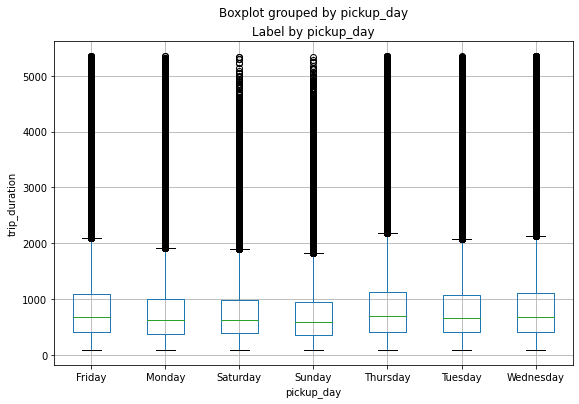

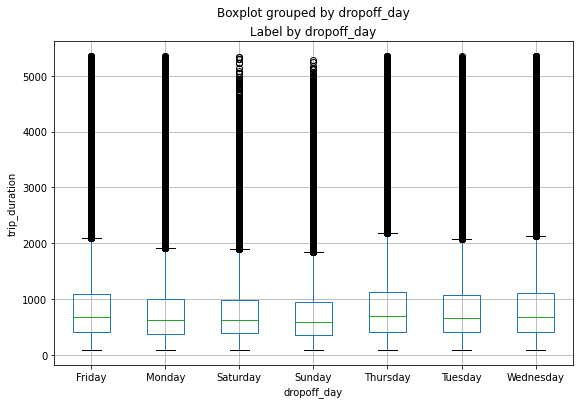

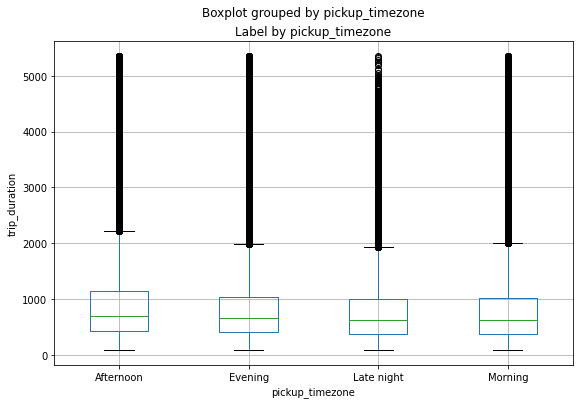

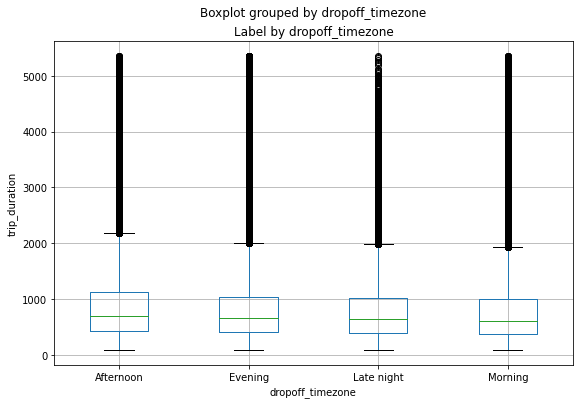

In [47]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column ='trip_duration', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("trip_duration")
plt.show()

Intially we had 1,458,644 records and after data cleaning by removing outliers we finally left with 1,373,783 records and added few additional features. Nearly 84,861 records were irrelavent to our problem statement and after data cleaning now we can start with our exploratory data analysis part .

#4.Exploratory Data Analysis

#Univariate Analysis 

#Passenger count feature

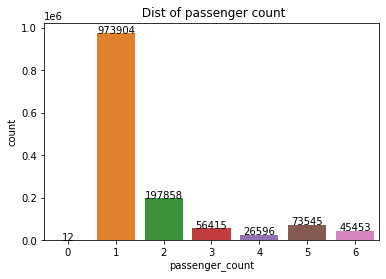

In [48]:
ax = sns.countplot(x = df['passenger_count'])
plt.title(' Dist of passenger count')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

In [49]:
df=df[df['passenger_count']!=0]  #remove the rows which have 0 or 7 or 9 passenger count.
df=df[df['passenger_count']<=6]

The above plot tells us that the mostly  the taxi trip passengers count is one.

It depicts that taxi are mostly prefered by those who likes to travel alone.

#pickup/dropoff day

Text(0.5, 1.0, ' no of dropoffs done on each day of the week')

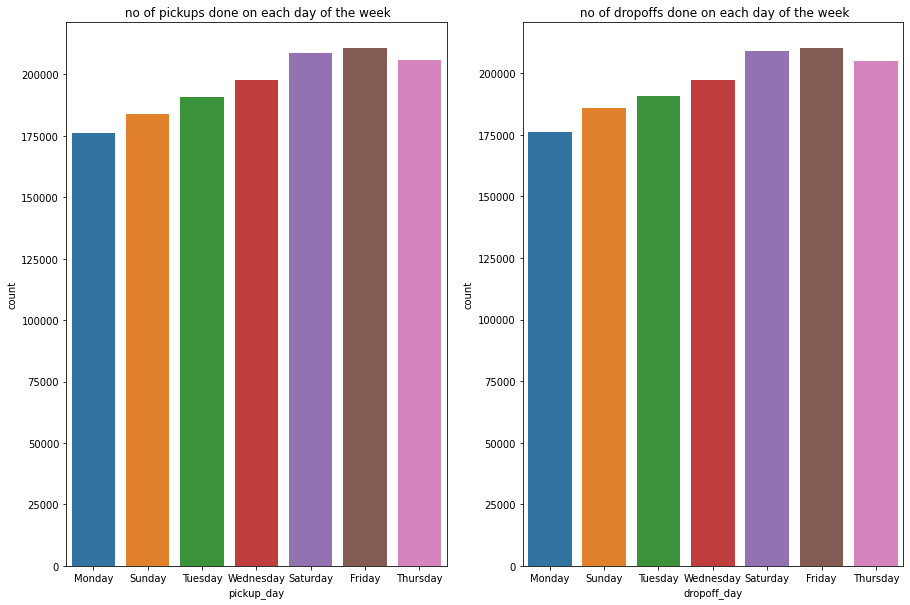

In [50]:
figure, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,10))
sns.countplot(x = 'pickup_day', data = df, ax = ax[0])
ax[0].set_title(' no of pickups done on each day of the week')

sns.countplot(x = 'dropoff_day', data = df, ax = ax[1])
ax[1].set_title(' no of dropoffs done on each day of the week')

#plt.tight_layout()

The plot tells us that mostly on friday's we can see a high demand for taxi trip and the least number of taxi trip demand on Monday.

#pickup_timezone 

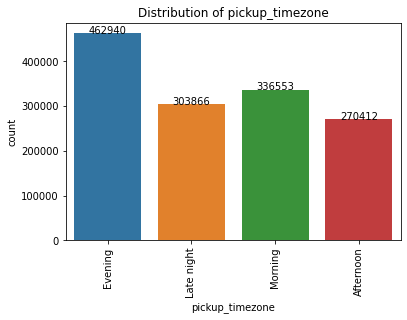

In [51]:
ax = sns.countplot(x=df['pickup_timezone']);
plt.title('Distribution of pickup_timezone')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

1. The high demand for taxi trip is in the evening timezone.
2. The least demand for taxi trip is in the afternoon timezone

#pickup_hour and drop off hour 

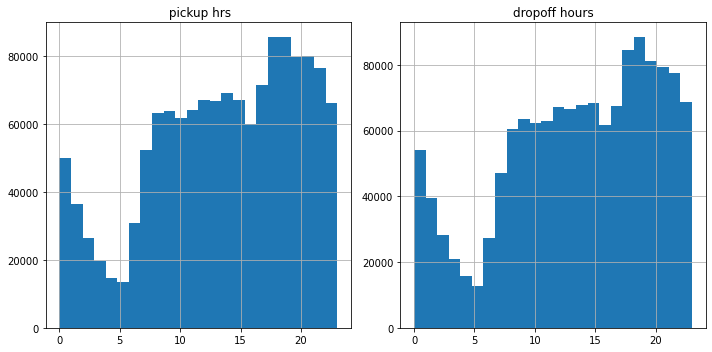

In [52]:
figure, ax = plt.subplots(nrows = 1, ncols=2, figsize = (10,5))


df.pickup_hour.hist(bins = 24, ax = ax[0])
ax[0].set_title(' pickup hrs')


df.dropoff_hour.hist(bins = 24, ax = ax[1])
ax[1].set_title('dropoff hours')



plt.tight_layout()

In [53]:
df['pickup_hour'].replace(to_replace=0,value=24,inplace=True) #replacing 0 hr with 24 hr 

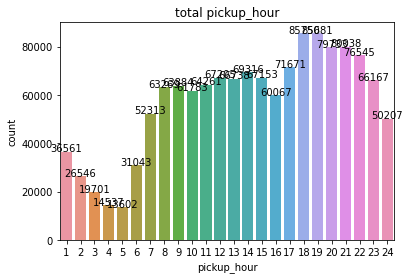

In [54]:
ax = sns.countplot(x = df['pickup_hour'])
plt.title('total pickup_hour')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

1. The most busy hours  for taxi trip were between evening 18-22 hr
2. The least busy hours were between early morning 2-5 hr

#pickup/dropoff_month 

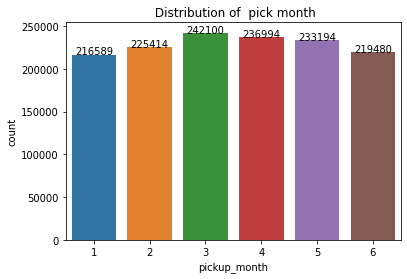

In [55]:
ax = sns.countplot(x = df['pickup_month'])
plt.title(' Distribution of  pick month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

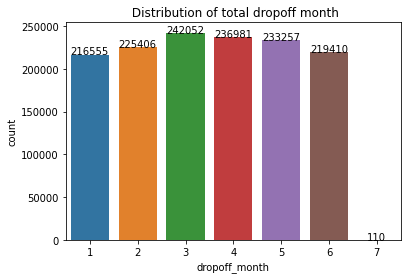

In [56]:
ax = sns.countplot(x = df['dropoff_month'])
plt.title(' Distribution of total dropoff month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

1.The month of March has received the highest number of trips followed by April for both pickup/dropoff.

2.The least number of trips done in the month of January and July. 

#Bivariate  Data Analysis

#Passenger Count and Vendor id

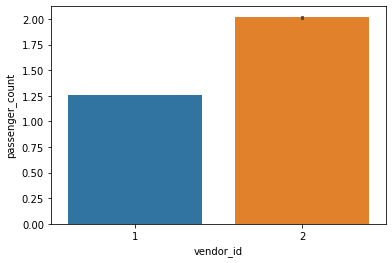

In [57]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

#Trip Duration per time zone

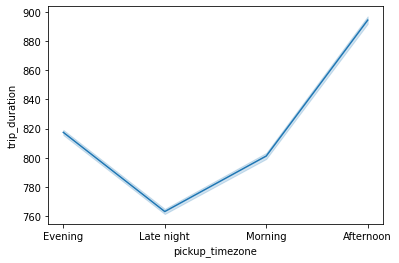

In [58]:
sns.lineplot(x='pickup_timezone',y='trip_duration',data=df)

From the above lineplot we can say that, trip duration is the maximum in the afternoon and lowest between late night and morning.

#Trip Duration per different days

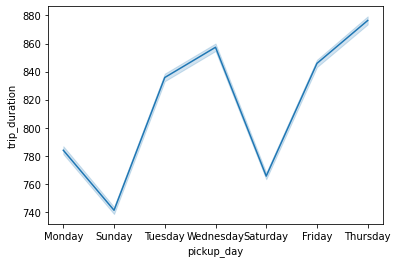

In [59]:
sns.lineplot(x='pickup_day',y='trip_duration',data=df)

From the above line plot we can say that,the trip duration is the maximum in Wednesday and lowest on Sunday

#Number of trips per day

Text(0, 0.5, 'Count of rides per day')

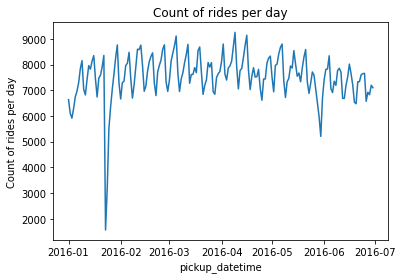

In [60]:
df.groupby(df.pickup_datetime.dt.date).size().plot()
plt.title('Count of rides per day')
plt.ylabel('Count of rides per day')

The number of rides per day is cyclical with a dip in the rides during the night time.

The sudden dip in the taxi rides between the 20th and 26th Jan was because of the heavy snow that was observed during that period.

#Plotting average trip duration for each hour over the entire year and the average number of rides per hour

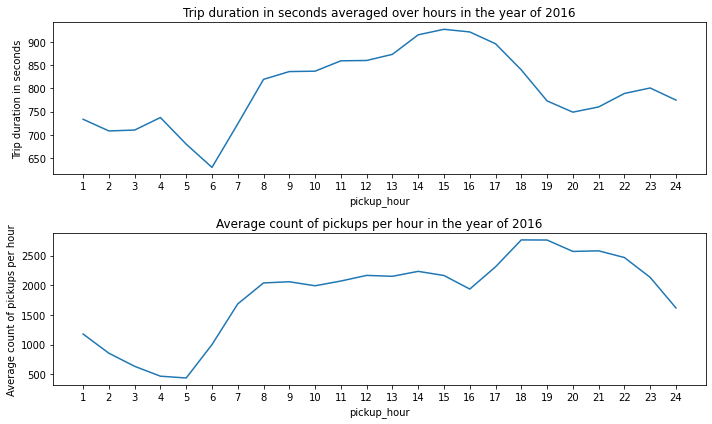

In [61]:
#Plotting average trip duration for each hour over the entire year
ax1 = plt.subplot(211)
df.groupby(df.pickup_hour)['trip_duration'].mean().plot(ax = ax1, figsize=(10,6))
plt.ylabel('Trip duration in seconds')
plt.xticks(df.pickup_hour.unique())
plt.title('Trip duration in seconds averaged over hours in the year of 2016')

# Plotting the average number of rides per hour
ax2 = plt.subplot(212)
df.groupby(['pickup_date', 
                    'pickup_hour']).count()['vendor_id'].groupby('pickup_hour').mean().plot(ax = ax2, figsize=(10,6))
plt.ylabel('Average count of pickups per hour')
plt.xticks(df.pickup_hour.unique())
plt.title('Average count of pickups per hour in the year of 2016')
plt.tight_layout()

Note: Please notice that the y-axis doesn't start at 0.

As one would expect the trip duration and the number of rides are higher in the evening time. As the number of rides go up in a certain area one can expect the resulting traffic to slow down the traffic increasing the trip duration time.

From the 2nd plot we can see how the pickup rides increase steadily from 5am to 8am only to flatten out between 8am to 4pm and then again steeply increase from 4pm to 6pm to fall down later.

The average trip duration is around 15 minutes during the evening time.

## Finding correlation in variables (both dependent and independent, Visualizations on data using Heat Map

In [62]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,pickup_date,dropoff_date,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,distance,trip_direction,time_diff_minutes,trip_speed
vendor_id,1.000000,0.288370,0.015982,0.006383,0.004374,0.005797,0.004877,0.010470,0.009212,0.000716,0.000769,-0.006634,-0.006643,0.001485,0.001637,0.007093,0.003539,0.004877,0.003246
passenger_count,0.288370,1.000000,0.003313,-0.002914,0.000625,-0.002178,0.013320,0.012273,0.008043,0.001944,0.002100,-0.002535,-0.002557,0.025726,0.025907,0.009849,0.000044,0.013320,-0.004006
pickup_longitude,0.015982,0.003313,1.000000,0.098844,0.227875,0.086392,0.295590,-0.001907,0.017789,-0.000224,-0.000425,0.008561,0.008616,-0.034892,-0.036269,0.418401,0.324614,0.295590,0.240637
pickup_latitude,0.006383,-0.002914,0.098844,1.000000,0.110949,0.443342,-0.150889,-0.019389,0.032465,-0.007677,-0.007670,-0.002356,-0.002423,-0.044877,-0.045642,-0.197064,0.086320,-0.150889,-0.047971
dropoff_longitude,0.004374,0.000625,0.227875,0.110949,1.000000,0.167392,0.244463,-0.035853,-0.047104,0.000674,0.000698,0.008156,0.008197,-0.002188,-0.001882,0.392253,-0.279381,0.244463,0.285751
dropoff_latitude,0.005797,-0.002178,0.086392,0.443342,0.167392,1.000000,-0.202518,-0.008755,0.021606,-0.006566,-0.006545,-0.001123,-0.001180,-0.026585,-0.027211,-0.194214,-0.223703,-0.202518,0.020145
trip_duration,0.004877,0.013320,0.295590,-0.150889,0.244463,-0.202518,1.000000,0.017869,0.030290,0.011202,0.011094,0.059959,0.060085,-0.033860,-0.032004,0.779613,0.027698,1.000000,0.027168
pickup_hour,0.010470,0.012273,-0.001907,-0.019389,-0.035853,-0.008755,0.017869,1.000000,0.682861,0.003187,0.003275,-0.000288,-0.000036,-0.035670,-0.032425,-0.006212,-0.007495,0.017869,-0.056851
dropoff_hour,0.009212,0.008043,0.017789,0.032465,-0.047104,0.021606,0.030290,0.682861,1.000000,-0.000232,-0.000366,-0.005540,-0.005920,-0.091346,-0.096067,-0.032859,0.011851,0.030290,-0.126392
pickup_date,0.000716,0.001944,-0.000224,-0.007677,0.000674,-0.006566,0.011202,0.003187,-0.000232,1.000000,0.998210,-0.014839,-0.014529,0.004659,0.004497,0.007605,-0.000588,0.011202,-0.000775


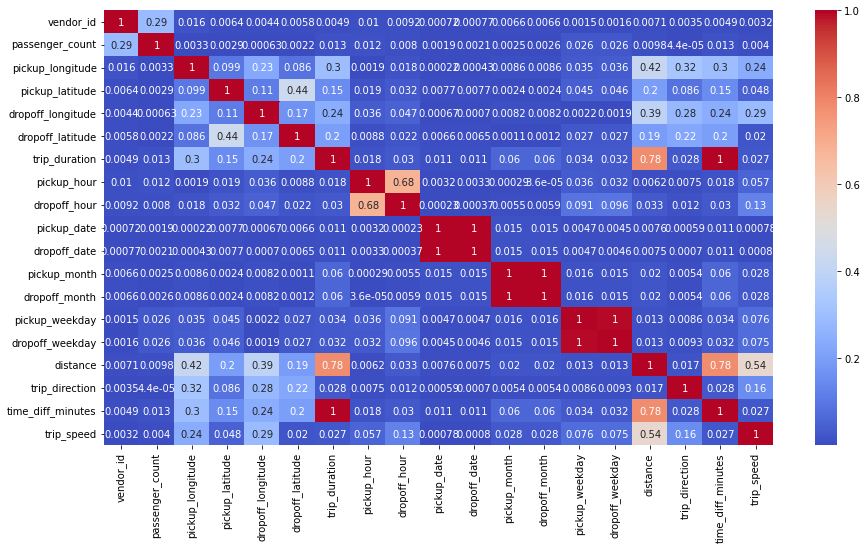

In [63]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

1. We can see a high correlation between pickup_month and dropoff_month,pickup_date and dropoff_date,pickup_weekday and dropoff_weekday.
2. Our target variable shows 0.78 percent correalation with distance.
3. pickup_hour and dropoff hour shows a correaltion of 0.68.
4. we drop time_diff_minutes since its highly correalted with trip_duration.
5. In all highly correalted features  we can only keep the pickup details and drop the dropoff details to remove multicollinearity.

In [64]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [65]:
calc_vif(df[[i for i in df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

,variables,VIF
0,passenger_count,2.436976
1,pickup_hour,4.825793
2,pickup_date,3.556230
3,pickup_month,4.242204
4,pickup_weekday,3.019396
5,distance,1.848857
6,trip_direction,2.846053


#5.Feature Engineering

# Multivariate Normality Distribution check and Handling Skewness


Text(0.5, 0, 'trip_duration')

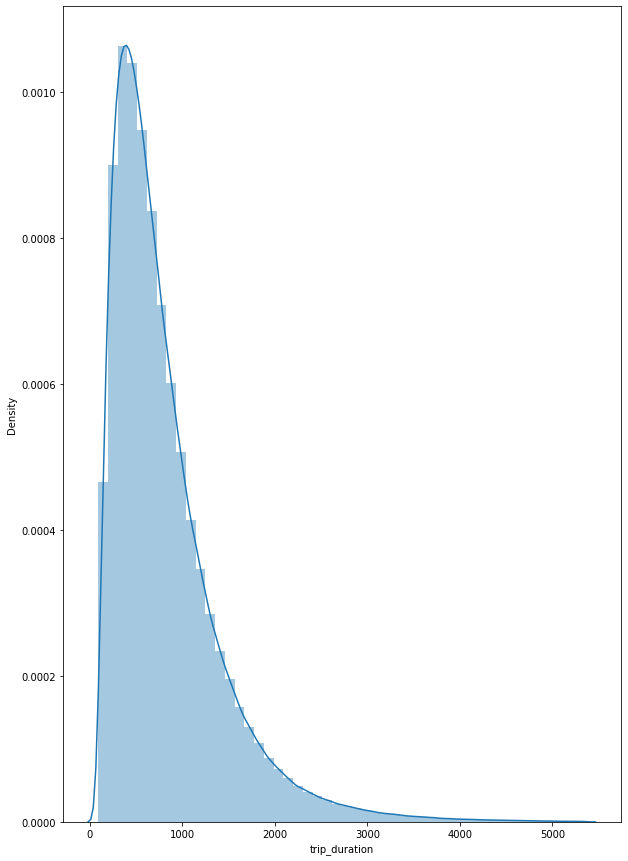

In [66]:
#  Check the distribution and handle the skewnwss if present
# Trip_Duration (Target Variable)
plt.figure(figsize=(10,15))
sns.distplot(df['trip_duration'])
plt.xlabel('trip_duration')

Text(0.5, 0, 'trip_duration')

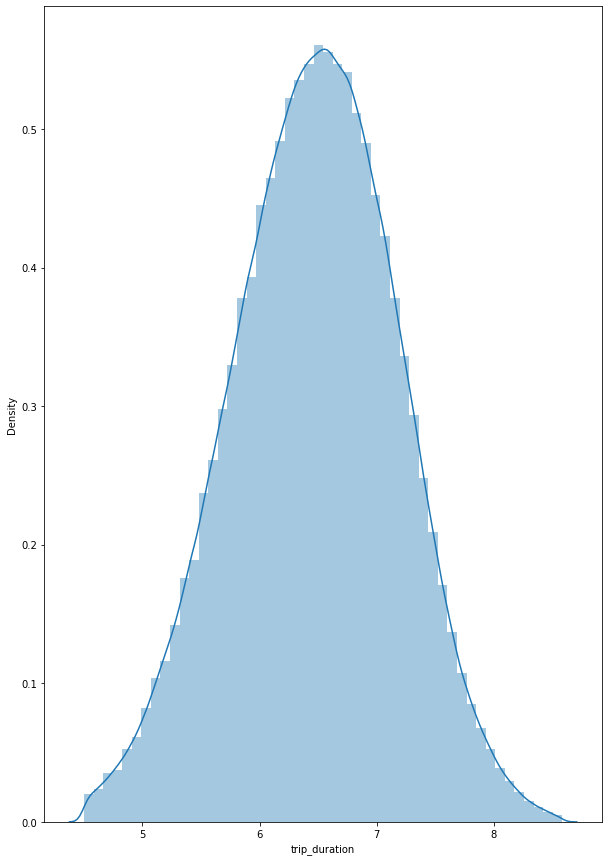

In [67]:
#Using log transform to bring it to normal distribution
plt.figure(figsize=(10,15))
sns.distplot(np.log(df['trip_duration']))
plt.xlabel('trip_duration')

In [68]:
numeric_features=df.describe().columns

In [69]:
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_hour',
       'dropoff_hour', 'pickup_date', 'dropoff_date', 'pickup_month',
       'dropoff_month', 'pickup_weekday', 'dropoff_weekday', 'distance',
       'trip_direction', 'time_diff_minutes', 'trip_speed'],
      dtype='object')

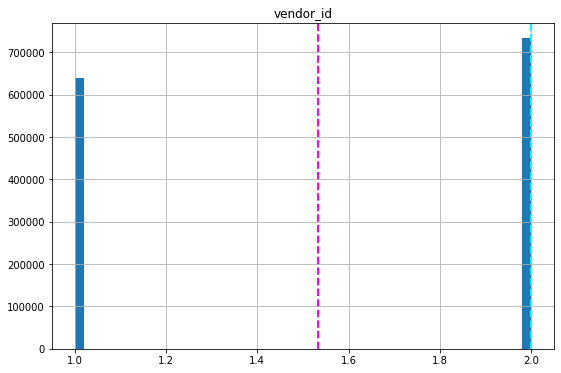

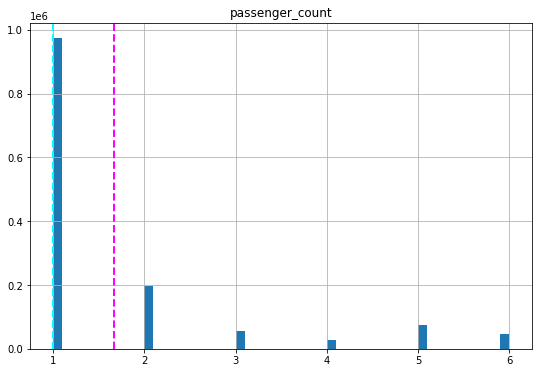

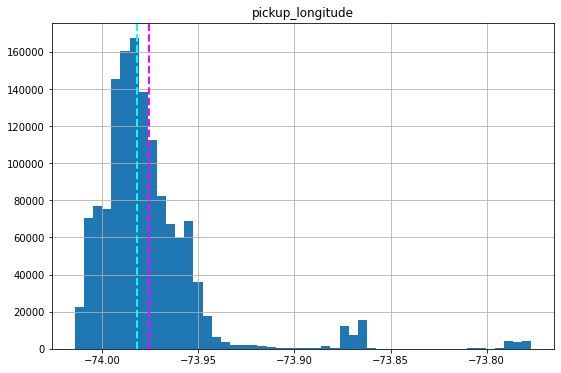

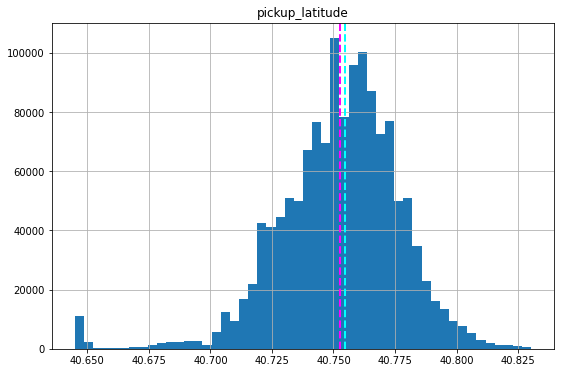

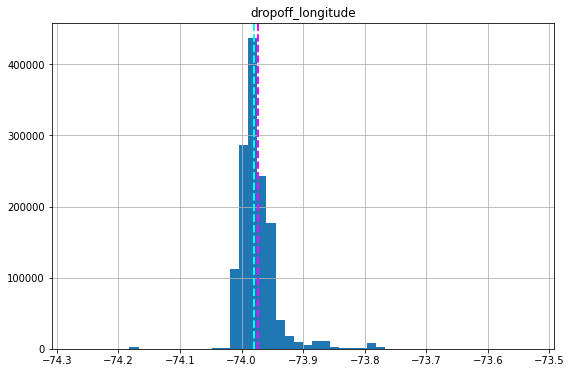

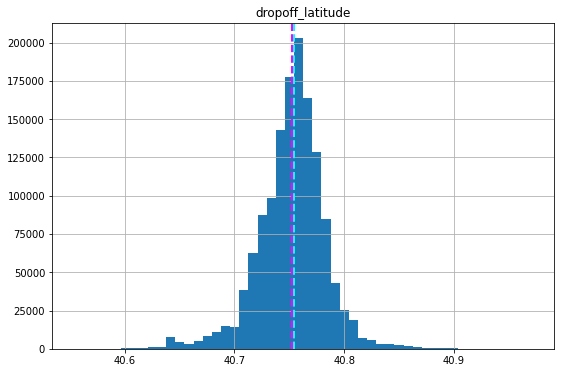

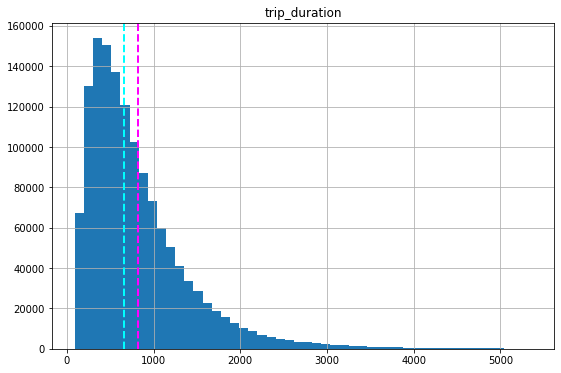

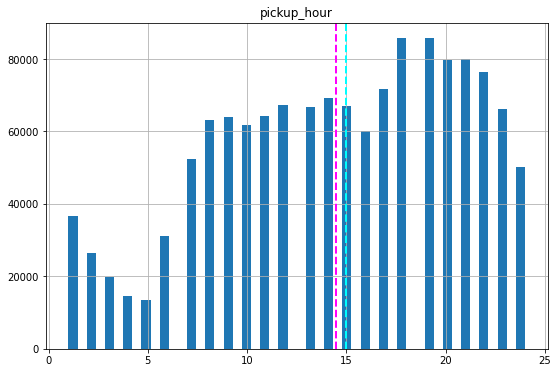

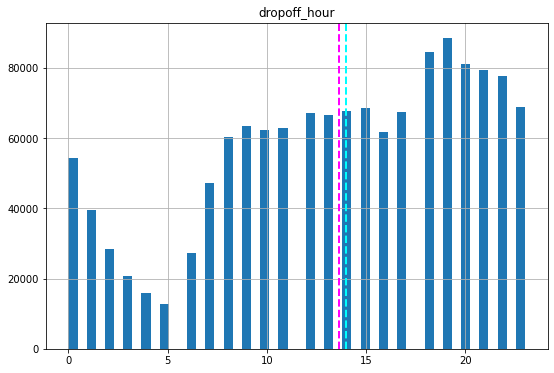

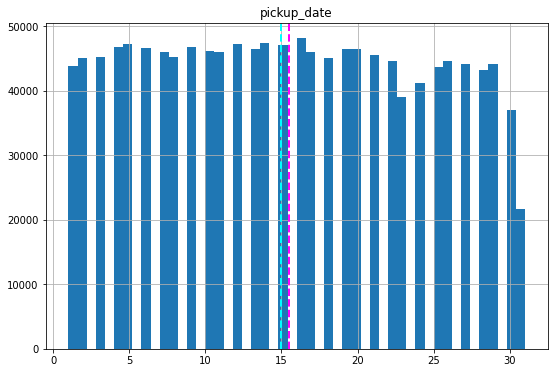

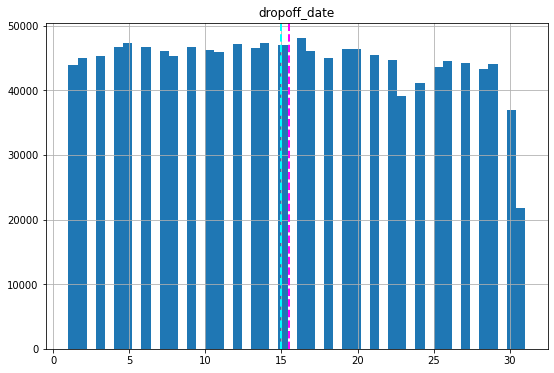

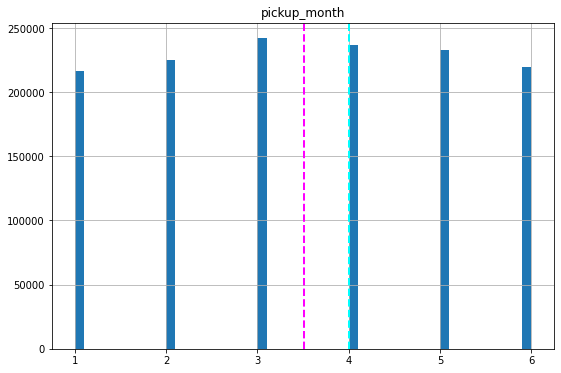

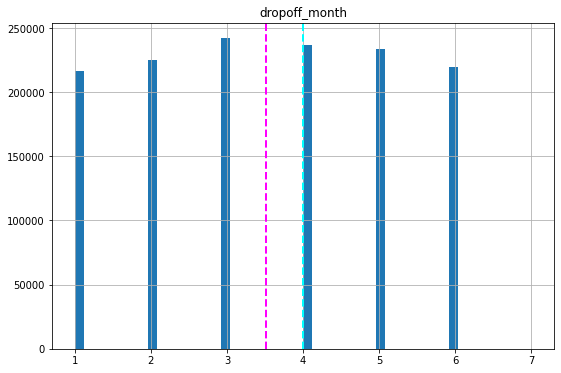

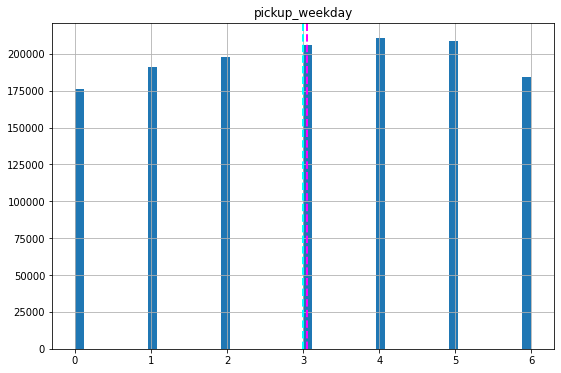

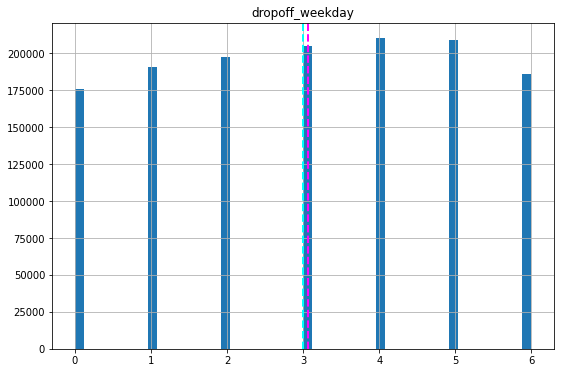

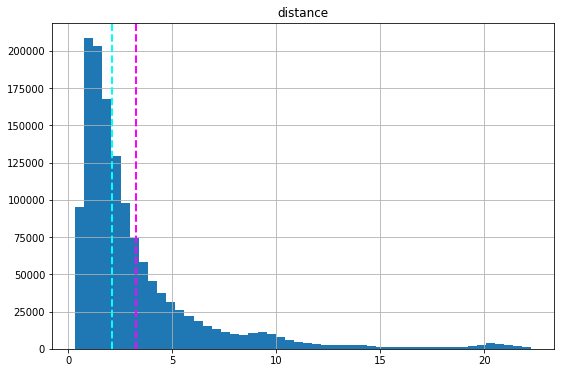

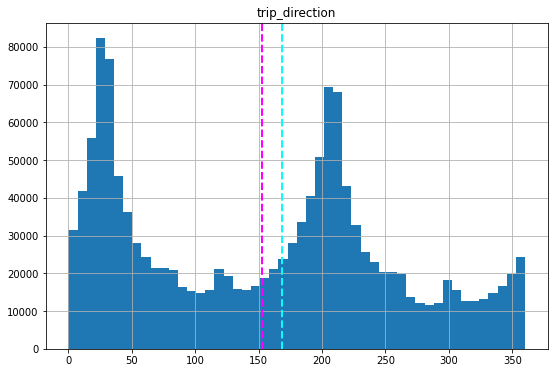

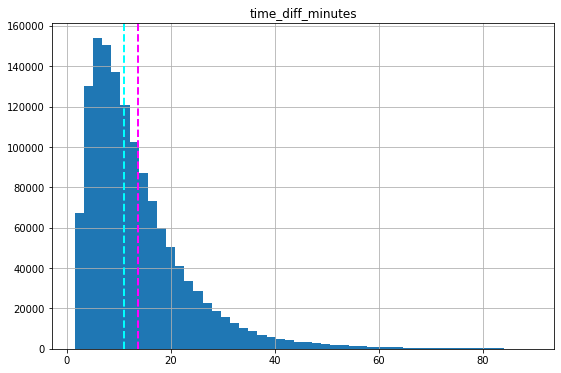

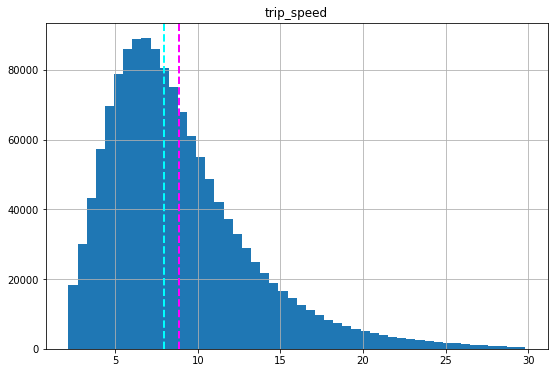

In [70]:
# plot a bar plot for each numerical features

for col in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Treating the skewness in the distance feature using log transform.

trip_speed,time_diff_minutes features are highly in correaltion with our target variable and it may result in data leakage and getting high accuracy near to 100 percentage hence we will not handle the skewness in these features and directly drop these features before model buliding

Text(0.5, 0, 'distance')

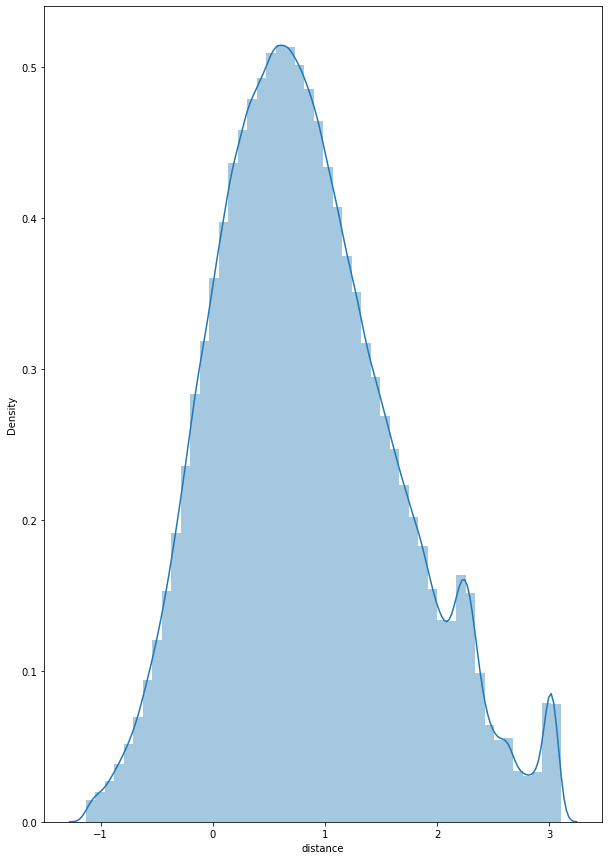

In [71]:
plt.figure(figsize=(10,15))
sns.distplot(np.log(df['distance']))
plt.xlabel('distance')

# Check for Linearity

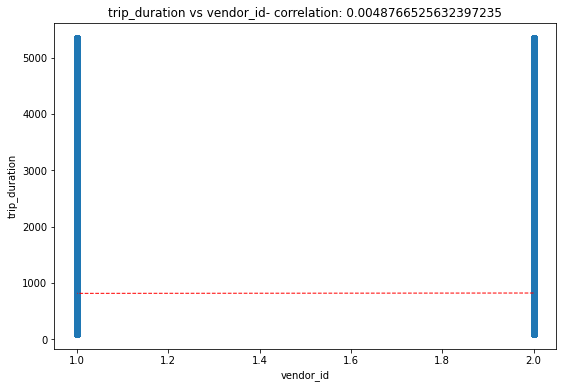

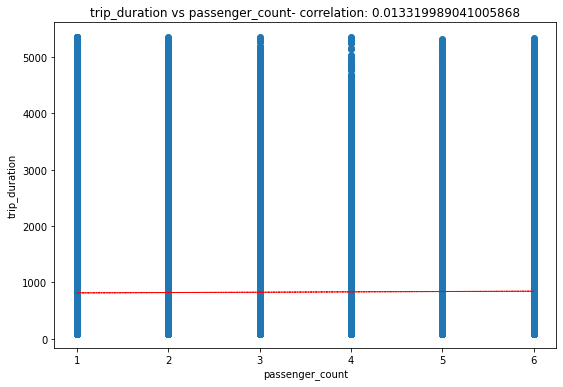

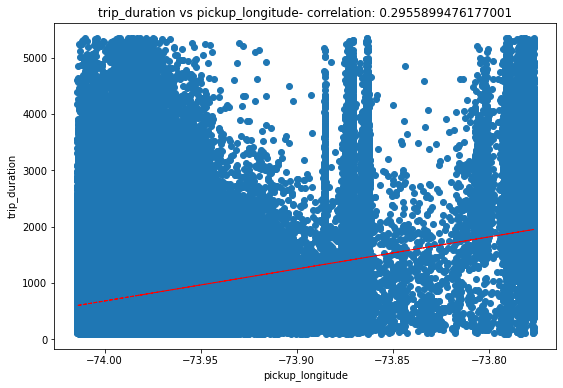

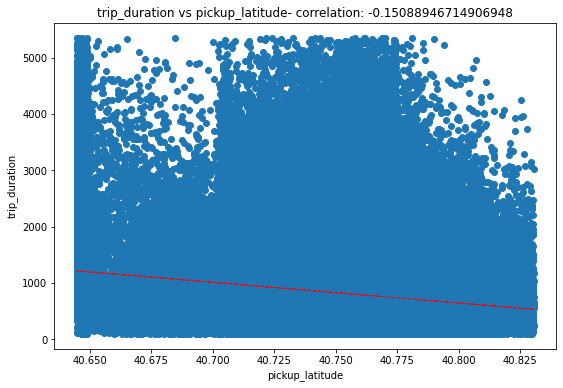

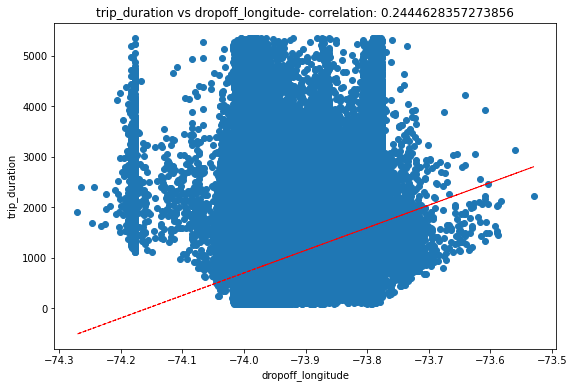

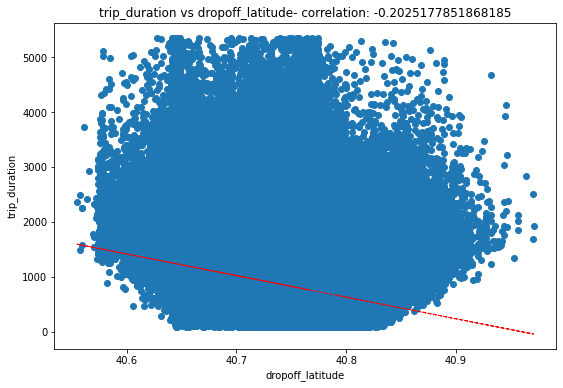

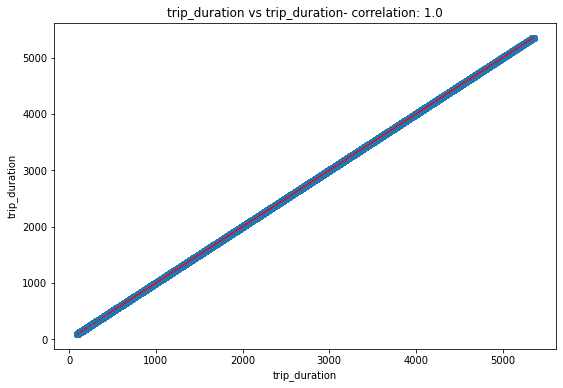

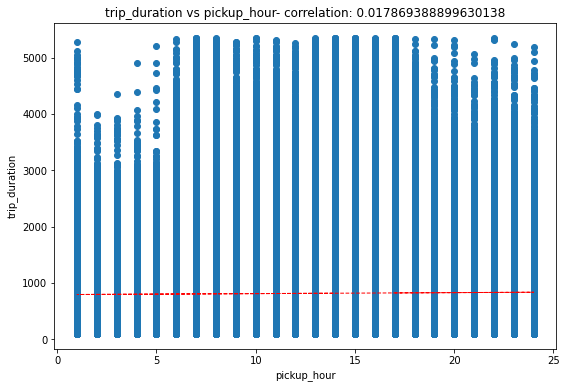

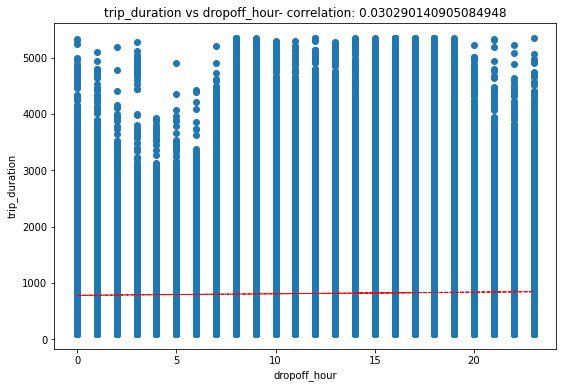

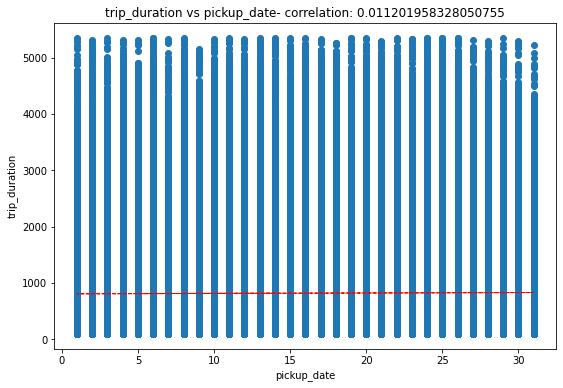

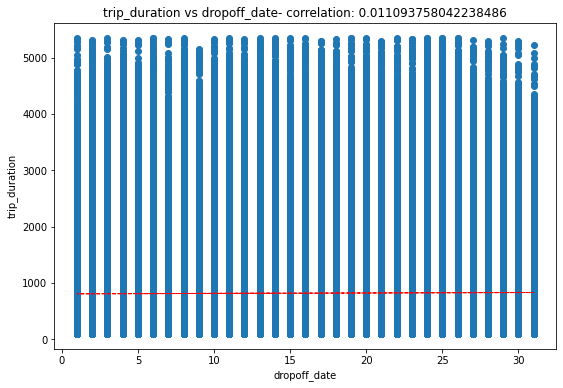

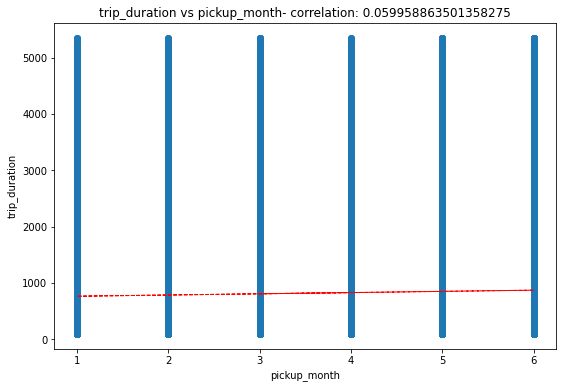

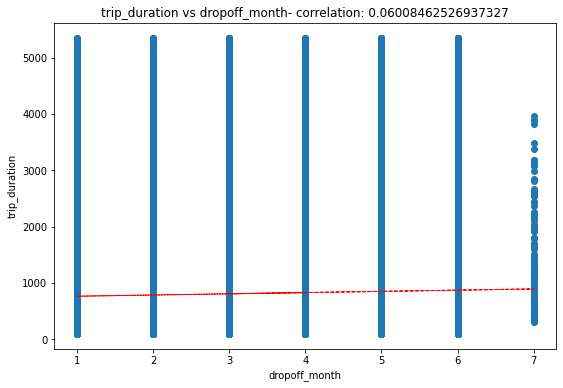

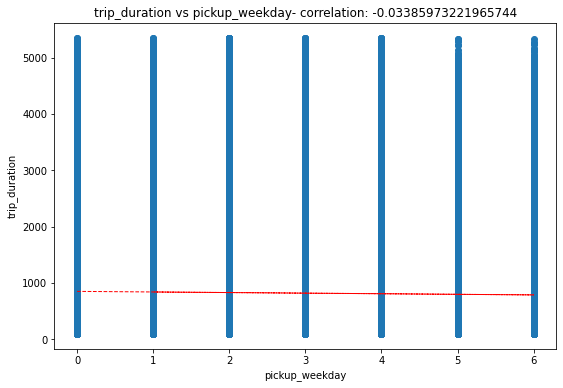

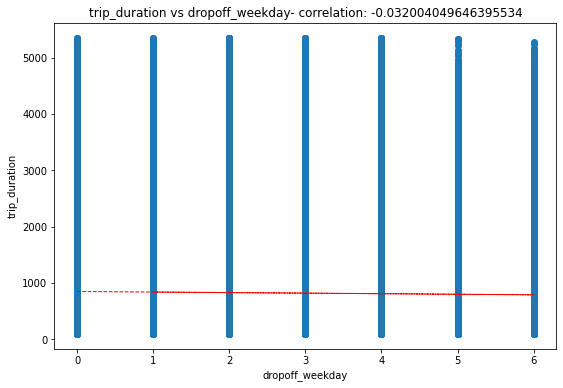

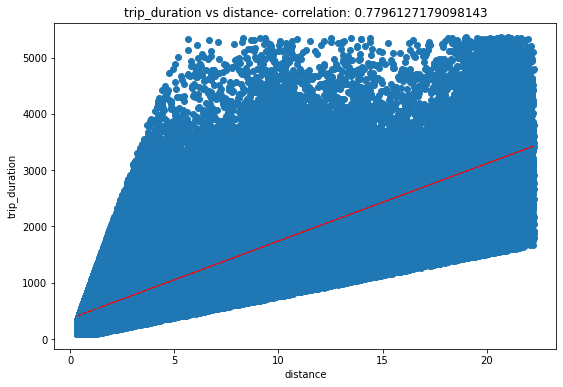

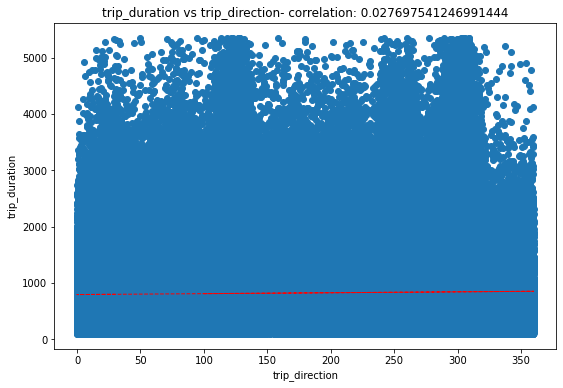

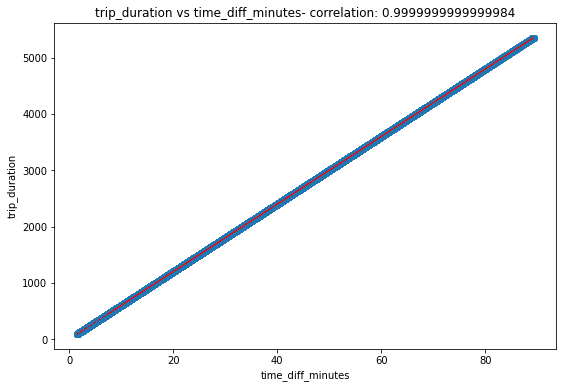

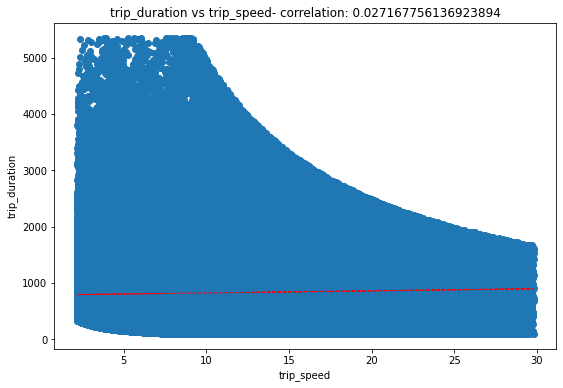

In [72]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

From above plot we can conclude that only trip_distance and trip_speed were having a linear relationship with trip_duration

# Encoding Categorical Features

In [73]:
df_copy = df.copy()

In [74]:
df_copy.drop(labels=['dropoff_timezone','store_and_fwd_flag',],axis=1,inplace=True)

In [75]:
# One hot encoding on pickup_timezone feature
df_copy = pd.get_dummies(df_copy,columns=["pickup_timezone"],prefix=["pickup_timezone"])


In [76]:
df_copy.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,...,pickup_weekday,dropoff_weekday,distance,trip_direction,time_diff_minutes,trip_speed,pickup_timezone_Afternoon,pickup_timezone_Evening,pickup_timezone_Late night,pickup_timezone_Morning
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,17,...,0,0,1.498523,99.970196,7.583333,7.362705,0,1,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,24,...,6,6,1.805510,242.846232,11.050000,6.087959,0,0,1,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,11,...,1,1,6.385108,200.319835,35.400000,6.720462,0,0,0,1
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,19,...,2,2,1.485501,187.262300,7.150000,7.741069,0,1,0,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,13,...,5,5,1.188590,179.473585,7.250000,6.108411,1,0,0,0


Handling Skewness in numerical features using log Transform

In [77]:
df_copy['distance'] = df_copy['distance'].map(lambda x : np.log(x) if x != 0 else 0)

In [78]:

df_copy['pickup_month'] = df_copy['pickup_month'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['pickup_hour'] = df_copy['pickup_hour'].map(lambda x : np.log(x) if x != 0 else 0)
df_copy['passenger_count'] = df_copy['passenger_count'].map(lambda x : np.sqrt(x) if x != 0 else 0)

In [79]:
df_copy.shape

(1373771, 27)

#6.Feature Selection

We cannot use all the columns from the dataframe because some of them are datetime and some of them were calculated based on the target variable such as trip_speed_mph.

So, we will use only the following columns:
cols_to_use = ['vendorid', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'distance, 'trip_direction',  'trip_duration']

In [80]:
features = ['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']

In [81]:
features.extend(['pickup_timezone_Afternoon', 'pickup_timezone_Evening',
       'pickup_timezone_Late night', 'pickup_timezone_Morning'])

In [82]:
features

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date',
 'distance',
 'trip_direction',
 'pickup_timezone_Afternoon',
 'pickup_timezone_Evening',
 'pickup_timezone_Late night',
 'pickup_timezone_Morning']

In [83]:
X = df_copy[features] #Independent features
y = np.log(df_copy['trip_duration'])  #Dependent features

In [84]:
X.shape

(1373771, 16)

**Lets split the data into train and test data**

In [85]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(1099016, 16)
(274755, 16)


In [86]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[features]=sc.fit_transform(X_train[features])
X_test[features]=sc.transform(X_test[features])

#Buliding a base model using Linear Regression 
We have many variables such as the pickup/dropoff month, weekday, hour of the day, trip direction which are not linear variables and can be difficult for a linear regression (LR) algorithm to model without first converting these variables to appropriate forms that can be fed to the LR models and understood by it. And, we also need to scale the data to prevent the dominance of larger magnitude variables in LR models.

Another alternative is we can use non-linear methods such as decision trees to fit the data. Decision tree doesn’t require us to convert the variables because it can split across any values of the variables and also, we don’t need to scale the data when using trees because each variable is considered separately for calculating the gain at each branching.

But before moving onto decision trees or random forest let’s check the performance of LR using only few significant variables which have vif values below 5,hence there will be no multicollinearirty 

We have to satisfy linear regression assumption inorder to use a linear regression model.


In [87]:
calc_vif(df[[i for i in df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

,variables,VIF
0,passenger_count,2.436976
1,pickup_hour,4.825793
2,pickup_date,3.556230
3,pickup_month,4.242204
4,pickup_weekday,3.019396
5,distance,1.848857
6,trip_direction,2.846053


In [88]:
features1= [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance','trip_direction'
 ]

In [89]:
features1

['passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date',
 'distance',
 'trip_direction']

In [90]:
X1 = df_copy[features1] #Independent features
y1 = np.log(df_copy['trip_duration'])  #Dependent features

#7.Model Buliding
Linear regression (with only few variables), Decision Tree, Random Forest and XGBoost were fit on the NYC taxi trip data with additional features added from the EDA notebook. For training, only a small sample (500,000) of the ~4.2M trips was used but the best model was tested on the entire dataset to verify that the training sample was selected randomly and represents the entire dataset indeed.






In [91]:
from sklearn.model_selection import train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split( X1,y1 , test_size = 0.2, random_state = 42) 
print(X1_train.shape)
print(X1_test.shape)

(1099016, 7)
(274755, 7)


In [92]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1_train[features1]=sc.fit_transform(X_train[features1])
X1_test[features1]=sc.transform(X_test[features1])

In [93]:
reg = LinearRegression().fit(X1_train, y1_train)

In [94]:
reg.score(X1_train, y1_train)

0.6716701111015286

In [95]:
reg.coef_


array([ 0.00543221, -0.02988634,  0.0469368 ,  0.02133044,  0.00341009,
        0.57165115,  0.0571389 ])

In [96]:
reg.intercept_

6.469054821693743

In [97]:
# Predicting the Test set results using training data
y_pred_train = reg.predict(X1_train)

In [98]:
y_pred_train

array([6.53846361, 6.69964193, 7.0995043 , ..., 5.79674716, 6.29365039,
       6.99520774])

## 8.**Regression Evaluation Metrics**

---



Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [99]:
# Predicting the Test set results using test data
y_pred_test = reg.predict(X1_test)

In [100]:
y_pred_test

array([5.97393809, 5.66943471, 6.72076835, ..., 7.31611487, 5.77099435,
       6.19864605])

In [101]:
# Test performance using Evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_test))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.15955422863134103
MAE : 0.3175283107741305
RMSE : 0.3994423971379866
R2 : 0.6723956868255684
Adjusted R2 :  0.6723766080340987


#Plotting a Scatter plot on Actual vs Predicted trip duration Values

Text(0, 0.5, 'Predicted trip duration')

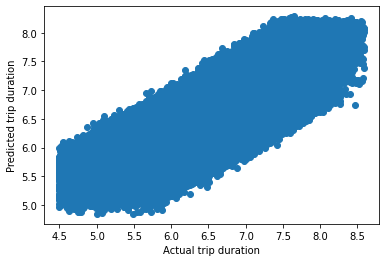

In [102]:
plt.scatter((y_test), (y_pred_test))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

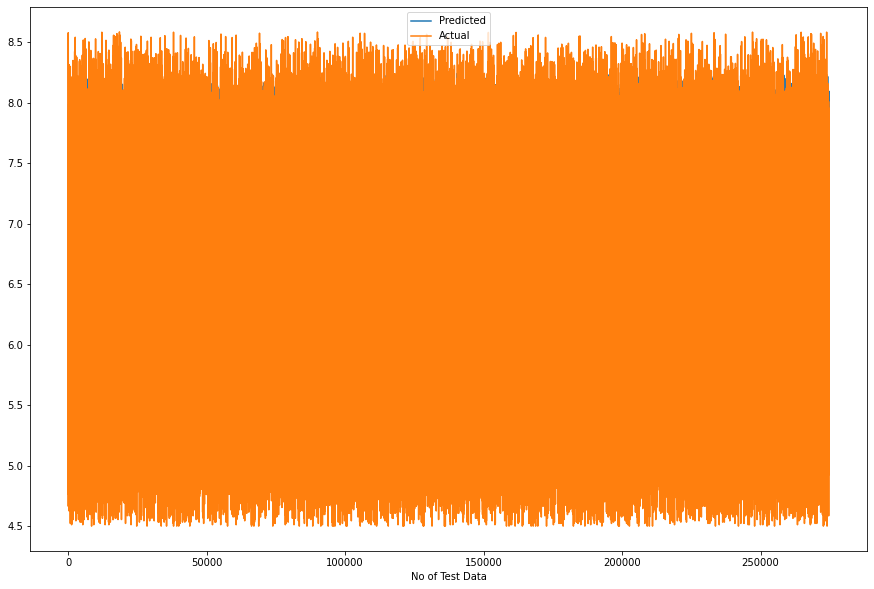

In [103]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

If we see above graph our prediction is quiet good.

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

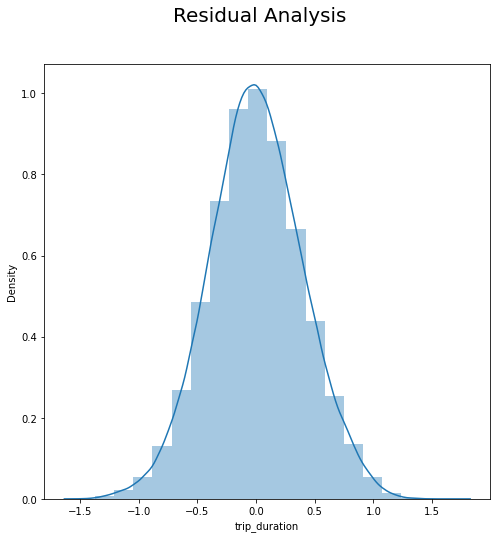

In [104]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_test)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

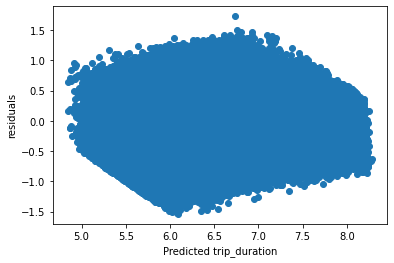

In [105]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted trip_duration')
plt.ylabel('residuals')

## **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [106]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [107]:
lasso.score(X_train, y_train)

0.69911478166009

In [108]:
y_pred_l = lasso.predict(X_test)

In [109]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.14644097466034697
MAE : 0.3027718423618912
RMSE : 0.38267607014333543
R2 : 0.699320442110967
Adjusted R2 :  0.6993029313446142


Text(0, 0.5, 'Predicted trip duration')

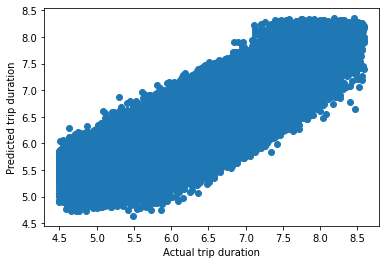

In [110]:
plt.scatter((y_test), (y_pred_l))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

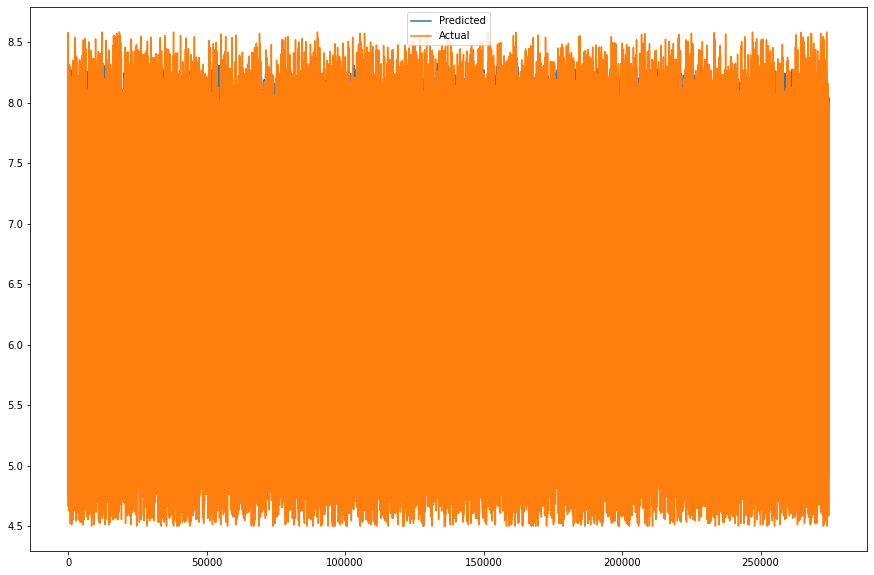

In [111]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_l))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

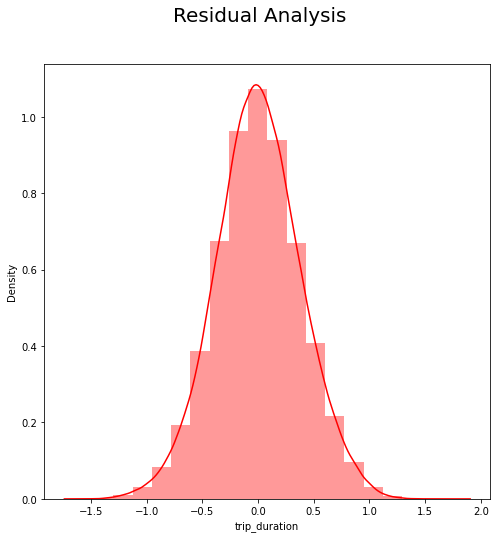

In [112]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

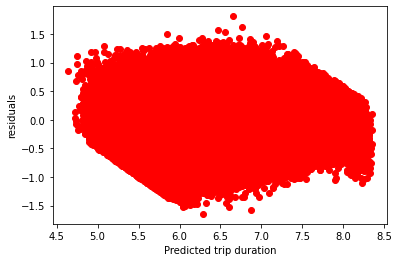

In [113]:
### Heteroscadacity
plt.scatter((y_pred_l),(y_test)-(y_pred_l),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

#Ridge

In [114]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [115]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [116]:
ridge.score(X_train, y_train)

0.6999387236984237

In [117]:
y_pred_r = ridge.predict(X_test)

In [118]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.14608657805675035
MAE : 0.3024425708120183
RMSE : 0.3822127392653865
R2 : 0.7000481060338135
Adjusted R2 :  0.7000306376446447


Text(0, 0.5, 'Predicted trip duration')

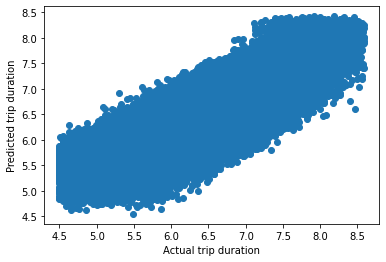

In [119]:
plt.scatter((y_test), (y_pred_r))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

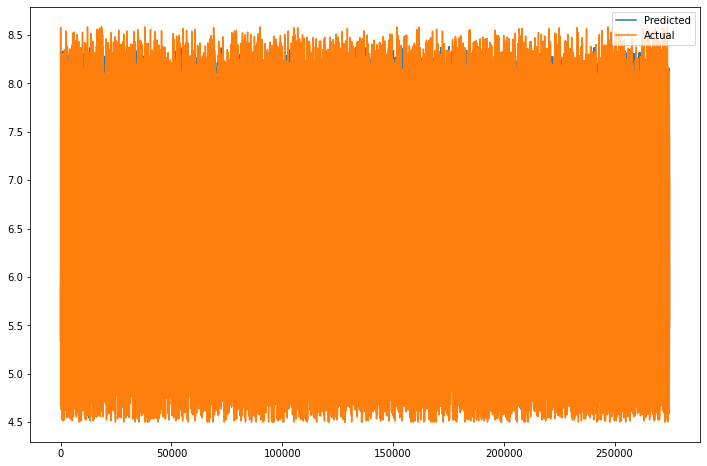

In [120]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

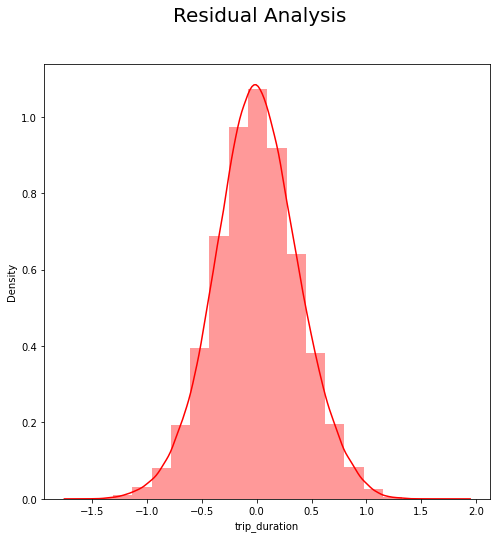

In [121]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

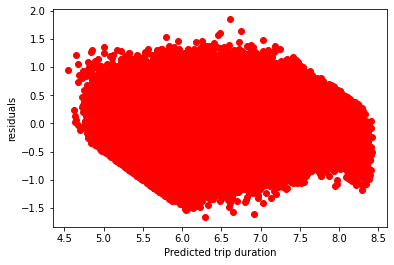

In [122]:
### Heteroscadacity
plt.scatter((y_pred_r),(y_test)-(y_pred_r),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

#Decision Tree

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [124]:
des_regressor = DecisionTreeRegressor(random_state=10)
cross_val_score(des_regressor, X_train, y_train, cv=5).mean()

0.6534258384705582

In [125]:
des_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

In [126]:
y_pred_des = des_regressor.predict(X_test)

In [127]:
#Evaluating the model using regression metrics
MSE  = mean_squared_error((y_test), (y_pred_des))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_des))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_des))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_des)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.16574272939666854
MAE : 0.3117509800741426
RMSE : 0.4071151303951605
R2 : 0.659689163405942
Adjusted R2 :  0.6596693446208248


Text(0, 0.5, 'Predicted trip duration')

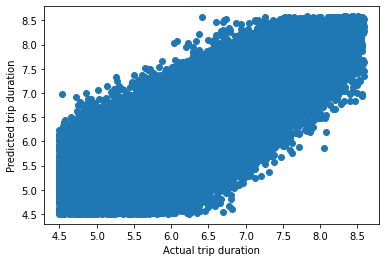

In [128]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_des))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

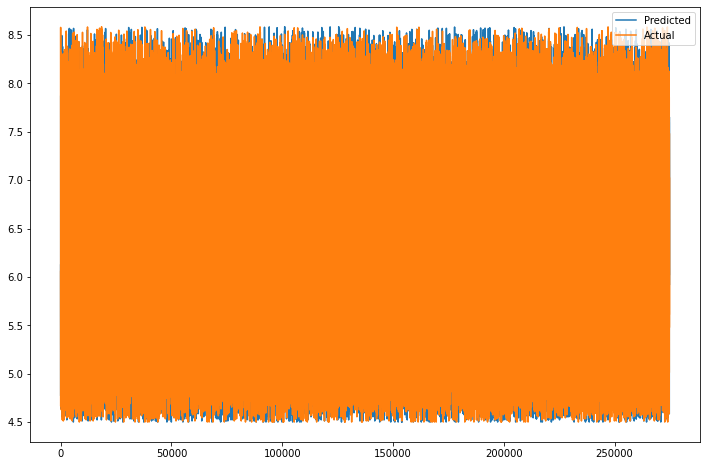

In [129]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_des))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#9. Hyperparameter Tuning 

Using Ensembling Techniques and Hyperparameter tuning to Improve the model accruracy and rmse metrics.

We have used RandomForest Ensemble Algo (bagging) and Xgboost Ensemble Algo(boosting) techniques

#Random Forest
Using RandomForest Ensemble technique to predict the trip_duration after applying hyperparameter tuning with help of RandomSearchcv (cross-validation technique)
Max depth and n estimator were the parameters we have selected with crossvalidation value 3 because if we add more parameters it will take  high computation time. 

It nearly took us 1.5hrs to run this Randomizedsearchcv hyperparameter tunning,so adding more parameters and cv value will increase time complexity.

So this hyperparameter tunning can be improved with adding more parameters and crossvalidation score to 5 or more to get a more refined model.We can also use Gridsearchcv for hyperparameter tunning

In [130]:
#importing reqd libraries
from sklearn.ensemble import RandomForestRegressor 

In [131]:
rf= RandomForestRegressor()

In [132]:
#Setting various parameter for hyperparameter tuning
param_dict_rf = {
    'max_depth': [4, 6, 8],
 'n_estimators': [80, 100]
  }

In [133]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 3, verbose=2)

Fitting the model to train data

In [134]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................max_depth=4, n_estimators=80; total time= 3.2min
[CV] END .......................max_depth=4, n_estimators=80; total time= 3.2min
[CV] END .......................max_depth=4, n_estimators=80; total time= 3.2min
[CV] END ......................max_depth=4, n_estimators=100; total time= 3.9min
[CV] END ......................max_depth=4, n_estimators=100; total time= 3.9min
[CV] END ......................max_depth=4, n_estimators=100; total time= 3.9min
[CV] END .......................max_depth=6, n_estimators=80; total time= 4.6min
[CV] END .......................max_depth=6, n_estimators=80; total time= 4.6min
[CV] END .......................max_depth=6, n_estimators=80; total time= 4.5min
[CV] END ......................max_depth=6, n_estimators=100; total time= 5.5min
[CV] END ......................max_depth=6, n_estimators=100; total time= 5.4min
[CV] END ......................max_depth=6, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'n_estimators': [80, 100]},
                   verbose=2)

In [135]:
# print the best parameters after cross validation
print(rf_random.best_params_)

{'n_estimators': 80, 'max_depth': 8}


In [136]:
print('Train  neg_mean_squared_error score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score: ', rf_random.best_estimator_.score(X_test,y_test))

Train  neg_mean_squared_error score :  0.7479352214822333
Test neg_mean_squared_error score:  0.7474679047682873


In [137]:
y_pred_rf = rf_random.predict(X_test)

In [138]:
#Evaluating the model using regression metrics
MSE  = mean_squared_error((y_test), (y_pred_rf))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_rf))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_rf))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.12299155425923423
MAE : 0.2745766735307121
RMSE : 0.35070151733238086
R2 : 0.7474679047682873
Adjusted R2 :  0.7474531979802794


#XGBOOST

Using XGboost Ensemble technique to predict the trip_duration after applying hyperparameter tuning with help of RandomSearchcv (cross-validation technique)

In [139]:
#importing reqd libraries
import xgboost as xg

In [140]:
xgb = xg.XGBRegressor()

In [141]:
#Setting various parameter for hyperparameter tuning
param_dict_xgb = {
    'max_depth': [4, 6, 8],
 'n_estimators': [60, 100]
  }

In [142]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2)

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[10:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time= 1.1min
[10:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time= 1.1min
[10:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time= 1.1min
[10:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .......................max_depth=4, n_estimators=60; total time= 1.1min
[10:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'n_estimators': [60, 100]},
                   verbose=2)

In [143]:
# print the best parameters after cross validation
xgb_random.best_params_

{'n_estimators': 100, 'max_depth': 8}

In [144]:
print('Train neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train neg_mean_squared_error score score :  0.8411991988761462
Test neg_mean_squared_error score score :  0.8364320749413443


In [145]:
y_pred_xg = xgb_random.predict(X_test)

In [146]:
#Evaluating the model using regression metrics
MSE  = mean_squared_error((y_test), (y_pred_xg))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_xg))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_xg))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.07966303574784456
MAE : 0.2171243068974053
RMSE : 0.2822464096279075
R2 : 0.8364320749413443
Adjusted R2 :  0.8364225491866218


#Comparing negative mean square error in different models 

>Ridge -0.165 (0.013)
>Lasso -2.596 (0.238)
>DecisionTree -92.933 (7.718)
>Random_forest -51.359 (4.179)
>XGBoost -35.370 (2.778)


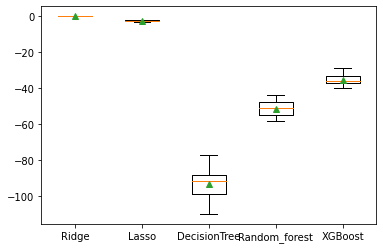

In [147]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=10, n_informative=15, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['Ridge'] = Ridge()
	models['Lasso'] = Lasso()
	models['DecisionTree'] = DecisionTreeRegressor()
	models['Random_forest'] = RandomForestRegressor()
	models['XGBoost'] = xg.XGBRegressor()

	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv =  RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 10. Conclusion

1.We can also use stacking algorithm over here to find the accuracy,but due to the high computation time we did'nt used it. 

2.Our base model (Linear Regression) gave us a r2_score of 0.67 in train and test data and keep this model accuracy in reference to compare other model.

3.We got the best model accuracy in Xgboost model,r2 score of 0.84 in training set and 0.83 in test data..The RMSE score of Xgboost model is 0.282

4.Our second best model is  RandomForestbased with a r2 score of 0.7485 accuracy in training and 0.7475 accuracy in test data. The RMSE score of random forest is 0.350

5.Decision Tree has given us least score in evaluation compared to all other algorithms based on negative mean absloute error and r2 score.


6.We just used ensemble techniques over here to demonstrate various other options for these kind of regression problems and to make the project little bit more informative.

7.We can also do Model Explainability  of random forest and Xgboost model over here using SHAP or LIME .But our team intention was not to make it more lengthy hence we restricted ourseleves till here. 

8.results in ridge and lasso regularized linear regression algorithm based on negative mean absoulte error is good compared to other models
